# SkLearn Neighbors Module

Neste notebook vamos listar as principais funções e usos do módulo `neighbors` da biblioteca **SkLearn**.

O módulo *neighbors* refere-se à algoritmos para o cálculo de funções aproximação para regressão ou classificação baseado na *proximidade* com dados existentes. A proximidade pode ser calculada através de métricas como a Distância de Manhattan ou Distância Euclidiana, não se limitando à essas (veja [sklearn.neighbors.DistanceMetric](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)).

No módulo da SkLearn indica-se dois usos: supervisionado e não-supervisionado.

## Ideia intuitiva

!! Exemplo de Janelas ou das Tomadas do MIT

## Algoritmos de cálculo de vizinhança

O método como são calculados os pontos mais próximos difere na seleção do argumento `algorithm` na instanciação das classes relacionadas ao algoritmo de `neighbors`.

A definição mais detalhada pode ser encontrada na [documentação do módulo do SkLearn](http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms), mas resumidamente:

 - **Brute Force**: método que calcula a distância do ponto a ser classificado com os todos existentes calculando a distância por pares. Esse método pode ser eficiente para *datasets* pequenos, mas escala em complexidade $\mathcal{O}(D*N^2)$. Pode ser configurado através do argumento `algorithm='brute'`.
 - **K-D Tree**: este método utiliza uma árvore para tomada da decisão de quais pontos calcular, reduzindo a busca para até $\mathcal{O}(D* N\log(N))$ e funciona bem para dimensões menores que 20. Pode ser configurado através do argumento `algorithm='kd_tree'`.
 - **Ball Tree**: Opção caso o número de dimensões sejam maiores que 20, onde o algoritmo *K-D Tree* torna-se ineficiente. Pode ser configurado através do argumento `algorithm='ball_tree'`.
 - **Auto**: Baseado em heurísticas é selecionado um dos algoritmos anteriores. Pode ser configurado através do argumento `algorithm='auto'`. 

## Decisão na proximidade: pesos dos pontos

Há casos onde a decisão da classe do novo ponto a ser avaliado levar em consideração as distâncias entre ele e os *K* pontos mais próximos, por exemplo, para um novo ponto $N$, onde $K=3$, e temos um ponto da classe 1 à 2 u.d. e dois pontos da classe 2 à 15 e 12 u.d., façamos $arg\,max$, a decisão entre usar as distâncias na decisão entre os pontos pode ser feita pelo parâmetro `weights`, sendo valores válidos `uniform` para atribuir um peso uniforme aos *K* pontos ou `distance` para atribuir o inverso das distâncias na decisão de pontos mais próximos.

Predicted Classes for P=[[ 1.5  2. ]]:
uniform=[2]
distance=[1]


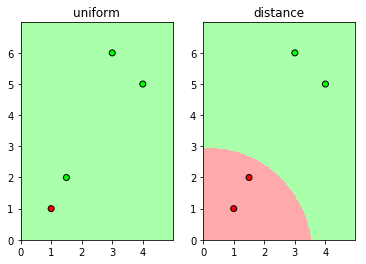

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

dataset = np.array([
    [1, 1, 1],
    [4, 5, 2],
    [3, 6, 2]
])

K = 3

X = dataset[:, :-1]
y = dataset[:, -1]

p = np.array([[1.5, 2]])

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00'])

print("Predicted Classes for P={}:".format(p))

for i, w in enumerate(['uniform', 'distance']):
    kc = KNeighborsClassifier(K, weights=w)
    
    kc.fit(X, y)
    r = kc.predict(p)
    
    print("{}={}".format(w, r))
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    meshdata = np.c_[xx.ravel(), yy.ravel()]
    Z = kc.predict(meshdata).reshape(xx.shape)
    
    Z[0, 0] = 1 # Gambi
    
    plt.subplot(1, 2, i+1)
    plt.title(w)
        
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    xx = np.concatenate([X, p])
    yy = np.concatenate([y, r])
    
    plt.scatter(xx[:,0], xx[:,1], c=yy, cmap=cmap_bold, edgecolor='k')
    

plt.show()

## Método "não-supervisionado"

O modo não supervisionado é realizado pela classe [sklearn.neighbors.NearestNeighbors](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html) e retorna basicamente os *K* pontos mais próximos de um certo dado.

## Classificação

A classe de um novo ponto é dada com base nas classes dos *K* pontos mais próximos encontrados, como exemplificado anteriormente ainda podemos atribuir os pesos com relação à distâncias.

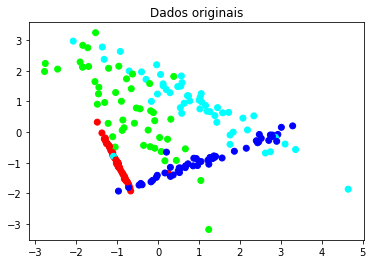

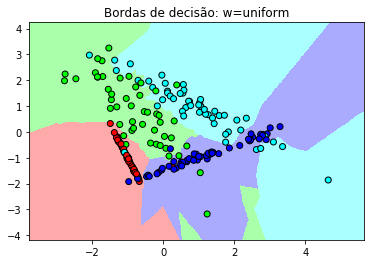

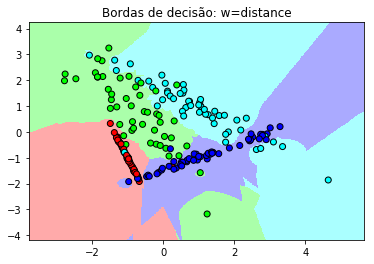

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

X, y = datasets.make_classification(n_samples=200, n_features=2,
                                    n_informative=2, n_redundant=0,
                                    n_clusters_per_class=1, n_classes=4)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AAFFFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#00FFFF'])

plt.figure()
plt.title("Dados originais")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.show()

for w in ['uniform', 'distance']:
    kc = KNeighborsClassifier(n_neighbors=5, weights=w)
    kc.fit(X,y)

    h = 0.02

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create meshgrid of all the range
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshdata = np.c_[xx.ravel(), yy.ravel()]
    Z = kc.predict(meshdata).reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.title('Bordas de decisão: w=' + w)
    plt.show()

## Regressão

Também é possível aproximar uma função com base em uma média dos *K* pontos mais próximos. Pode-se fazer baseado na distância entre os pontos, fazendo como média ponderada através de `weights='distance'`: $\hat{y} = \frac{\sum_{i=1}^{k} w_{i^{NNi}}y}{\sum_{i=1}^{k} w_{i^{NNi}}}$

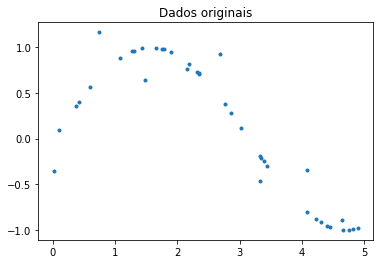

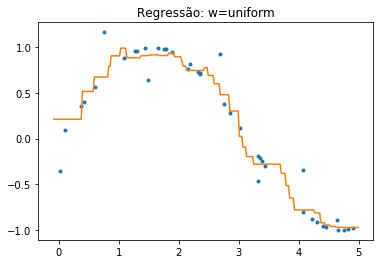

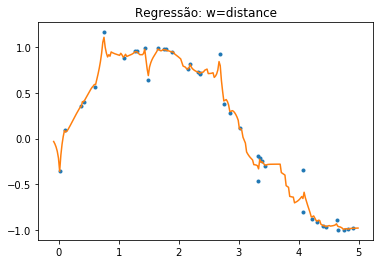

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsRegressor

# SIN + Noise dataset
# np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# X, y = datasets.make_regression(n_samples=100, n_features=1, n_informative=1,
#                                 bias=1, noise=1.5, effective_rank=1)

plt.figure()
plt.title("Dados originais")
plt.plot(X, y, '.')
plt.show()

for w in ['uniform', 'distance']:
    kc = KNeighborsRegressor(n_neighbors=5, weights=w)
    kc.fit(X,y)

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    xx = np.arange(x_min, x_max, h).reshape(-1, 1)

    plt.plot(X, y, '.')
    plt.plot(xx, kc.predict(xx))
    plt.title('Regressão: w=' + w)
    plt.show()

## Regressão - Reconstrução de Dígitos

Baseado no [exemplo](http://scikit-learn.org/stable/auto_examples/plot_multioutput_face_completion.html) na documentação da SkiKit, podemos reconstruir a parte inferior de uma imagem treinando com os pixeis da parte superior, utilizando os inferiores como *Y*.

![Generating Faces](http://scikit-learn.org/stable/_images/sphx_glr_plot_multioutput_face_completion_001.png)

### Podemos repetir a ideia com o dataset de dígitos

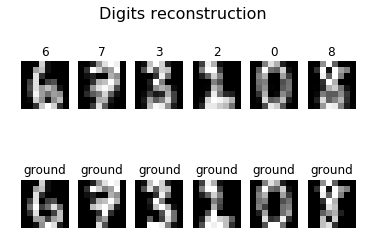

In [7]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

digits = load_digits()

X = digits.data
y = digits.target

imgsize = X.shape[1]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.6)

XtrainUp = Xtrain[:, :(imgsize + 1) // 2]
XtestUp  = Xtest[:, :(imgsize + 1) // 2]
XtrainDown = Xtrain[:, (imgsize) // 2:]
XtestDown = Xtest[:, (imgsize) // 2:]

kn = KNeighborsRegressor(10)
kn.fit(XtrainUp, XtrainDown)

XhatDown = kn.predict(XtestUp)

plt.figure()

image_shape = (8, 8)

nsamples = 6

for i in range(nsamples):
    chosen = np.random.randint(0, XtestUp.shape[0])
    xhat = kn.predict(XtestUp[chosen].reshape(1, -1))
    x = np.hstack([XtestUp[chosen].ravel(), xhat.ravel()])

    sub = plt.subplot(2, nsamples, i + 1)
    plt.title(ytest[chosen])
    sub.axis("off")
    sub.imshow(x.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")
    
    sub = plt.subplot(2, nsamples, i + 1 + nsamples)
    xt = np.hstack([XtestUp[chosen].ravel(), XtestDown[chosen].ravel()])
    plt.title("ground")
    sub.axis("off")
    sub.imshow(xt.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")
    
plt.suptitle("Digits reconstruction", size=16)
plt.show()

## Nearest Centroid

Calcule a centroide de cada classe de forma que $P = \{(X_1, Y_1), \dots, (X_i, Y_n)\}$ e $\mu_n = \frac{\sum_{i=0}^{n} X_i}{n}$, e para avaliar um ponto $\hat{y}$, verifique a centroide $\mu_n$ mais próxima de $\hat{x}$

None 0.813333333333
0.2 0.82


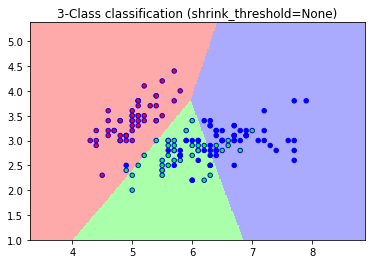

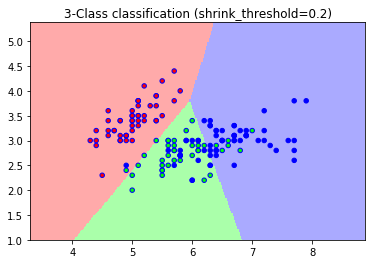

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for shrinkage in [None, .2]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(shrinkage, np.mean(y == y_pred))
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='b', s=20)
    plt.title("3-Class classification (shrink_threshold={})".format(shrinkage))
    plt.axis('tight')

plt.show()

## Exercício

Classificar Digits com K-NN Classifier (`sklearn.neighbors.KNeighborsClassifier`), utilize $K = 11$, separe 60% do dataset para treino e use `sklearn.metrics.classification_report` para verificar os scores da classificação.


## Referências

1. [Introduction to Learning, Nearest Neighbors - MIT OpenCourseWare](https://www.youtube.com/watch?v=09mb78oiPkA)
1. [Documentação oficial do módulo neighbors da SkLearn](http://scikit-learn.org/stable/modules/neighbors.html)